# 핸즈온 머신러닝 Chapter 8

In [8]:
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴더
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [9]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

### 8.3 PCA(주성분 분석)란?

- 데이터를 가장 가까운 초평면에 정의하고 데이터를 이 평면에 투영하는 방법
- 훈련세트를 투영하기 전에 먼저 올바른 초평면을 선택해야 함
- 분산이 최대로 보존되는 축을 선택하는 것이 정보가 가장 적게 손실됨 = 원본 데이터 셋과 투영된 것 사이의 평균 제곱 거리를 최소화하는 축

__8.3.2 주성분__ 

- i번째 축을 정의하는 단위 벡터는 i번째 `주성분`이라고 부름
- 그렇다면 주성분은 어떻게 찾을까? --> 특잇값 분해(SVD)를 사용함
- 아래의 파이썬 코드를 사용해서 `svd()`함수를 사용해서 주성분을 구하고 PC를 추출할 수 있음

In [5]:
from six.moves import urllib
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [6]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [2]:
X_centered = X - X.mean(axis = 0)
U, s, Vt = np.linalg.svd(X_centered)

#Vt가 주성분을 의미함
#주성분을 추출한 후 처음 두 개의 PC를 추출함
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

NameError: name 'X' is not defined

__8.3.3 d차원으로 투영하기__

- 주성분을 모두 추출했다면 처음 *d*개의 주성분으로 정의한 초평면에 투영하여 데이터셋의 차원을 *d*차원으로 축소시킬 수 있다
--> 이 초평면은 분산을 가능한 한 최대로 보존하는 투영임을 보장함
- 초평면에 훈련세트를 투영하기 위해서는 행렬 *X*에 첫 *d*개의 주성분을 담은(즉, V의 첫 *d*열로 구성된) 행렬 *Wd*를 점곱하면 된다
- 파이썬 코드는 첫 두개의 주성분으로 정의된 평면에 후련세트에 투영한 것

In [ ]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

#짠 PCA로 변환되었습니다

__8.3.4 사이킷런 사용하기__

- PCA모델을 사용해 데이터셋의 차원을 2로 줄이는코드는 다음과 같음

In [1]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

NameError: name 'X' is not defined

__8.3.6 적절한 차원 수 선택하기__

- 축소할 차원 수를 임의로 정하기보다는 충분한 분산이 될 때까지 더해야 할 차원 수를 선택하는 쪽을 더 선호함
- 물론 데이터 시각화를 위해 차원을 축소하는 경우에는 차원을 2개나 3개로 줄이는 것이 일반적

In [10]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [11]:
#훈련 세트의 분산을 95%로 유지하는데 필요한 최소한의 차원의 수
d

153

- 아래는 `n_components=d`로 설정하여 PCA를 다시 실행한 경우
- 유지하려는 주성분의 수를 지정하는 것 보다 분산 비율 `0.0`에서 `1.0`사이로 설정하는 편이 더 나음

In [12]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [13]:
pca.n_components_

153

In [14]:
np.sum(pca.explained_variance_ratio_)

0.9500528781364685

__8.3.7 압축을 위한 PCA__

- MNIST의 784개의 특징을 분산의 95%만 유지하도록 PCA를 적용하였음 
- 결과적으로 784개의 특성이 아니라 150개의 특성만 각 샘플이 갖게 됨
- 다시 반대로 적용하여 784개의 차원으로 되돌릴 수 있지만 투영에서 일정량의 정보(유실된 5%의 분산)를 잃어버렸기 때문에 원본 데이터셋을 얻을 수 는 없음
- 원본데이터와 재구성된 데이터 사이의 평균제곱거리를 재구성 오차라고 함

In [15]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [16]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, '압축 후 복원')

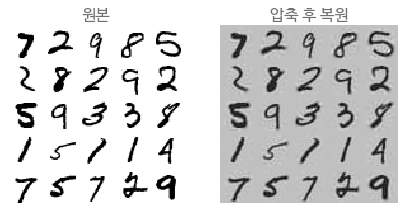

In [17]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("원본", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("압축 후 복원", fontsize=16)

#save_fig("mnist_compression_plot")

In [18]:
X_reduced_pca = X_reduced

__8.3.8 점진적 PCA__

- 점진적 PCA = IPCA(Incremental PCA)
- 훈련 세트를 미니배치로 나눈 뒤 IPCA 알고리즘에 한번에 하나씩 주입함
- 이런 방식은 훈련세트가 클 때 유용하고 온라인으로 PCA를 적요할 수 있음

- 아래의 코드는 MNIST 데이터를 100개의 미니배치로 나누고 `IncermentalPCA` 클래스를 주입하여 데이터 세트의 차원을 154개로 줄임
- 이 경우 `fit()`메소드가 아니라 `partial_fit()`메소드를 미니배치마다 호출해야 함

In [19]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [20]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

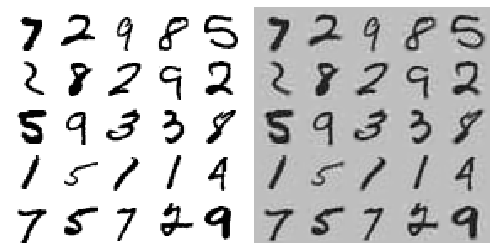

In [21]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [22]:
X_reduced_inc_pca = X_reduced

In [23]:
#평균을 비교해보면 평균의 결과는 같음을 확인 가능
np.allclose(pca.mean_, inc_pca.mean_)

True

In [24]:
#하지만 결과가 완전히 동일한가의 여부를 살펴보면 그렇지 않음을 알 수 있음
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

#### `memmap()` 사용하기

- `memmap()`는 필요할 때 데이터를 메모리에 적재함
- `IncrementalPCA`는 특정 순간에 배열의 일부만 사용하기 때문에 메모리 부족 문제를 해결할 수 있음
- 다음과 같이 코드를 사용하면 일반적인 `fit()`메소드를 사용할 수 있음

In [25]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [26]:
del X_mm

In [27]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

__8.3.9 랜덤 PCA__

- 확률적 알고리즘으로, 첫 *d*의 주성분에 대한 근삿값을 빠르게 찾아냄

In [29]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

__시간복잡도__

주성분 개수를 바꾸어가며 Incremental PCA, Random PCA에 비해 일반 PCA의 시간을 재어봄

In [30]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components)
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} seconds".format(pca.__class__.__name__, t2 - t1))

n_components = 2
    PCA: 2.0 seconds
    IncrementalPCA: 14.0 seconds
    PCA: 2.0 seconds
n_components = 10
    PCA: 2.3 seconds
    IncrementalPCA: 14.9 seconds
    PCA: 2.1 seconds
n_components = 154
    PCA: 4.4 seconds
    IncrementalPCA: 20.1 seconds
    PCA: 4.8 seconds


Text(0.5, 1.0, 'PCA와 랜덤 PCA의 시간 복잡도')

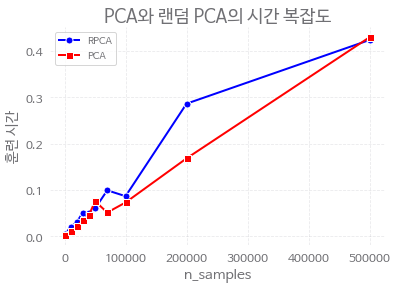

In [34]:
#데이터 세트의 크기(샘플의 수)를 바꾸어가면서 일반 PCA와 Random PCA 비교
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components = 2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("훈련 시간")
plt.legend(loc="upper left")
plt.title("PCA와 랜덤 PCA의 시간 복잡도")

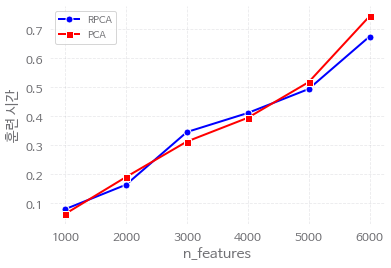

In [35]:
#특정의 개수를 달리하면서 2000샘플에 있는 데이터셋에서 성능을 비교할 경우
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("훈련 시간")
plt.legend(loc="upper left")

__8.4 커널 PCA__

- PCA를 적용해서 차원 축소를 위한 복잡한 비선형 투형을 수행할 수 있음
- 즉, PCA는차원 축소를 선형 변환 기법을 이용하기 때문에 선형으로 분리 불가능한 데이터에 대해서는 적당하지 않음
- 투영된 후에 샘플의 군집을 유지하거나 꼬인 매이폴드에 가까운 데이터 셋을 펼칠 때도 유용함
- 다음 코드는 사이킷런의 `KernelPCA`를 사용했음

In [37]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [38]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

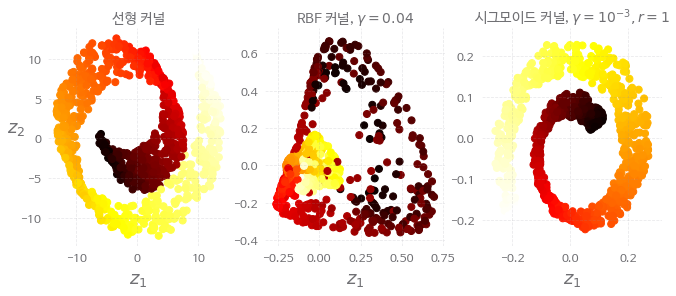

In [43]:
from sklearn.decomposition import KernelPCA
from mpl_toolkits.mplot3d import Axes3D

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "선형 커널"), (132, rbf_pca, "RBF 커널, $\gamma=0.04$"), (133, sig_pca, "시그모이드 커널, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

#save_fig("kernel_pca_plot")
plt.show()

- 위의 사진들은 각각 선형 커널, RGF커널, 시그모이드 커넝르 사용하여 2차원으로 축소시킨 스위스롤의 모습

- 차원을 축소한 RBF 커널을 다시 3차원으로 표현한 경우를 표현하면 다음과 같이 표현할 수 있음

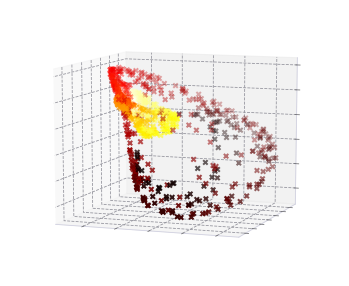

In [44]:
plt.figure(figsize=(6, 5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

#save_fig("preimage_plot", tight_layout=False)
plt.show()

__8.4.1 커널 선택과 하이퍼파라미터 튜닝__

- kPCA는 비지도학습이기 때문에 좋은 커널과 하이퍼파라미터를 선택하기 위한 명확한 성능 측정 기준은 부재함
- 하지만 차원 축소는 지도학습의 전처리 단계로 활용되기 때문에 주어진 문제에서 성능이 가장 좋은 커널과 하이퍼 파라미터를 선택할 수 있음

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver='liblinear'))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                 

In [ ]:
print(gird_search, best_params_)